# Experimental Template
The following notebook acts as a template for experiments. The one step not included is the data cleaning phase!
<br />
<br />
I have put FIXME tags next to the areas that you will need to address.
<br />
<br />
If you are curious to know more about how the code works, look at the `helper_functions.py` file.

## Imports and Setup

In [1]:
from helper_functions import pd, os, shutil
from helper_functions import convert_samples_to_binary, get_column_data_types, print_library_versions, add_id_column, order_columns_by_correlation

In [2]:
print_library_versions()

pandas version:           1.4.1
matplotlib version:       3.5.1
numpy version:            1.18.5
bitstring version:        3.1.9
joblib version:           1.1.0
PIL version:              8.2.0


## Data Loading and Cleaning

In [3]:
# FIXME - update the filename to point to your dataset
filename = '/mnt/sda1/iris.csv'
df = pd.read_csv(filename)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# NOTE:
The following code segments are specific to my dataset. This is where you will need to perform your own data cleaning!!!
<br />
<br />
This will be the most difficult/time intensive aspect.

In [6]:
# FIXME - change the value 'species' to match the 'y' value of your dataset
# This function will give your dataframe an 'id' column which will be used to identify the samples in the dataset
df = add_id_column(df, 'Species')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1-setosa,5.1,3.5,1.4,0.2,Iris-setosa
1,2-setosa,4.9,3.0,1.4,0.2,Iris-setosa
2,3-setosa,4.7,3.2,1.3,0.2,Iris-setosa
3,4-setosa,4.6,3.1,1.5,0.2,Iris-setosa
4,5-setosa,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,46-virginica,6.7,3.0,5.2,2.3,Iris-virginica
146,47-virginica,6.3,2.5,5.0,1.9,Iris-virginica
147,48-virginica,6.5,3.0,5.2,2.0,Iris-virginica
148,49-virginica,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# FIXME - Perform any data cleaning or preprocessing steps here

In [16]:
# FIXME - get the correct values in x and Y for your dataset
x = df.drop(['Species', 'Id'], axis=1)
Y = df['Species']
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (150, 4)
Y (150,)
This value should be True: True


## Image Generation

In [ ]:
# FIXME - update the image directory to point to a directory where you want the images to be saved. Create a folder there.
# Change any other constants you want to change
image_directory = "/mnt/sda1/image-results-iris"
feature_types = get_column_data_types(x)
precision = 64
one = 128
zero = 0
n_jobs = -1
# For feature_types, 0 = float, 1 = int, 2 = bool
print(feature_types)

In [14]:
convert_samples_to_binary(x, df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

## Place Folders into the Correct Categories

In [15]:
dirs = Y.unique().tolist()
if not os.path.exists(image_directory + '/data'):
    os.mkdir(image_directory + '/data')
new_dir = image_directory + '/data/'
if not os.path.exists(new_dir+'Train/'):
    os.mkdir(new_dir+'Train/')
for i in dirs:
    i = str(i).split('-')[1]
    if not os.path.exists(new_dir+'Train/'+i):
        os.mkdir(new_dir+'Train/'+i)

### Place pictures into the correct folder

In [16]:
total_images = 0
type_counts = {value.split("-")[1]: 0 for value in dirs}
for file in os.listdir(image_directory):
    try:
        dir = file.split("-")[1].split(".")[0]
        type_counts[dir]+=1
    except:
        continue
    
    shutil.move(f"{image_directory}/{file}", f"{new_dir}Train/{dir}/{file}")
    total_images += 1
print(total_images)
print(type_counts)

150
{'setosa': 50, 'versicolor': 50, 'virginica': 50}


## Train ResNet50

### Once experiments are running, view the live updates on TensorBoard
Run the command `tensorboard --logdir=[your log directory]` in the terminal. 
<br />
<br />
Then, open a browser and navigate to `localhost:6006`.
<br />
<br />
![TensorBoard](./tensorboard.png)

In [2]:
from resnet import print_dl_versions, train_resnet_model_k_fold, evaluate_on_test_data, plot_metrics

2023-03-05 20:45:38.718087: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
# FIXME - update the values below to match your dataset
img_size = 64
target_size = (img_size,img_size)
# Number of classification types
num_classes = 3
# Number of samples to run through the model before updating the weights
# Higher batch size means more memory is required and training will be faster. Maybe use 64 for larger datasets
batch_size = 32
# Number of times to run through the entire dataset
# Depending on the size of your dataset, you may want to increase/decrease this number
num_folds = 5
number_of_epochs = 100

In [4]:
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

2023-03-05 20:35:35.924583: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-03-05 20:35:35.925317: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-03-05 20:35:35.974794: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-05 20:35:35.975207: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.7715GHz coreCount: 20 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 298.32GiB/s
2023-03-05 20:35:35.975238: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-03-05 20:35:35.977159: I tensorflow/stream_executor/platform/d

Fold:  0
Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


2023-03-05 20:35:37.442172: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:35:37.442197: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 20:35:37.442223: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2023-03-05 20:35:37.442752: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.10.1
2023-03-05 20:35:37.511244: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:35:37.511340: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 20:35:37.595386: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-03-05 20:35:37.612039: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 4200000000 Hz


Epoch 1/100


2023-03-05 20:35:41.631161: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-03-05 20:35:41.780525: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-03-05 20:35:42.370133: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-03-05 20:35:42.418247: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


2/4 [==============>...............] - ETA: 0s - loss: 1.4416 - acc: 0.2891 - f1_m: 0.2414 - precision_m: 0.2692 - recall_m: 0.2188 - auc: 0.4977 - false_negatives: 38.0000 - false_positives: 29.0000 - true_negatives: 67.0000 - true_positives: 10.0000 - mean_absolute_error: 0.4447 - mean_squared_error: 0.2820 

2023-03-05 20:36:16.557549: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:36:16.557580: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 20:36:16.619121: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.


3/4 [=====================>........] - ETA: 0s - loss: 1.4480 - acc: 0.3038 - f1_m: 0.2522 - precision_m: 0.2863 - recall_m: 0.2257 - auc: 0.5075 - false_negatives: 49.6667 - false_positives: 36.3333 - true_negatives: 91.6667 - true_positives: 14.3333 - mean_absolute_error: 0.4407 - mean_squared_error: 0.2786

2023-03-05 20:36:16.620800: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 20:36:16.628778: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-03-05 20:36:16.656224: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:36:16.685483: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_20_36_16
2023-03-05 20:36:16.707791: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_20_36_16/drake-pc.trace.json.gz
2023-03-05 20:36:16.758444: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris/results/tb_logs/train/plug

4/4 [==============================] - 89s 17s/step - loss: 1.4487 - acc: 0.3323 - f1_m: 0.2846 - precision_m: 0.3258 - recall_m: 0.2531 - auc: 0.5273 - false_negatives: 64.2000 - false_positives: 45.4000 - true_negatives: 127.4000 - true_positives: 22.2000 - mean_absolute_error: 0.4326 - mean_squared_error: 0.2733 - val_loss: 64.2239 - val_acc: 0.2000 - val_f1_m: 0.2000 - val_precision_m: 0.2000 - val_recall_m: 0.2000 - val_auc: 0.3950 - val_false_negatives: 24.0000 - val_false_positives: 24.0000 - val_true_negatives: 36.0000 - val_true_positives: 6.0000 - val_mean_absolute_error: 0.5333 - val_mean_squared_error: 0.5322

Epoch 00001: val_acc improved from -inf to 0.20000, saving model to /mnt/sda1/image-results-iris/results/fold0-resnet50v2-saved-model-01-val_acc-0.20.hdf5
Epoch 2/100
4/4 [==============================] - 0s 80ms/step - loss: 1.1253 - acc: 0.5644 - f1_m: 0.5833 - precision_m: 0.6331 - recall_m: 0.5417 - auc: 0.7726 - false_negatives: 37.4000 - false_positives: 25.400

2023-03-05 20:37:24.139599: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:37:24.139625: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 20:37:24.139739: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:37:24.139806: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.5274 - acc: 0.2578 - f1_m: 0.2308 - precision_m: 0.3242 - recall_m: 0.1797 - auc_1: 0.4742 - false_negatives_1: 39.5000 - false_positives_1: 19.0000 - true_negatives_1: 77.0000 - true_positives_1: 8.5000 - mean_absolute_error: 0.4546 - mean_squared_error: 0.2815 

2023-03-05 20:37:27.875850: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:37:27.875876: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.5855 - acc: 0.2935 - f1_m: 0.2464 - precision_m: 0.3286 - recall_m: 0.1986 - auc_1: 0.4881 - false_negatives_1: 62.0000 - false_positives_1: 32.7500 - true_negatives_1: 123.2500 - true_positives_1: 16.0000 - mean_absolute_error: 0.4479 - mean_squared_error: 0.2808

2023-03-05 20:37:28.262087: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-05 20:37:28.266192: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 20:37:28.276058: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-03-05 20:37:28.311721: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:37:28.346998: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_20_37_28
2023-03-05 20:37:28.369670: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_20_37_28/drake-pc.trace.json.gz
2023-03-05 20:37:28.435546: I tensorflow/core

4/4 [==============================] - 5s 606ms/step - loss: 1.6018 - acc: 0.2998 - f1_m: 0.2491 - precision_m: 0.3289 - recall_m: 0.2021 - auc_1: 0.4901 - false_negatives_1: 68.4000 - false_positives_1: 36.6000 - true_negatives_1: 136.2000 - true_positives_1: 18.0000 - mean_absolute_error: 0.4466 - mean_squared_error: 0.2810 - val_loss: 119.1093 - val_acc: 0.2000 - val_f1_m: 0.2000 - val_precision_m: 0.2000 - val_recall_m: 0.2000 - val_auc_1: 0.4233 - val_false_negatives_1: 24.0000 - val_false_positives_1: 24.0000 - val_true_negatives_1: 36.0000 - val_true_positives_1: 6.0000 - val_mean_absolute_error: 0.5323 - val_mean_squared_error: 0.5312

Epoch 00001: val_acc improved from -inf to 0.20000, saving model to /mnt/sda1/image-results-iris/results/fold1-resnet50v2-saved-model-01-val_acc-0.20.hdf5
Epoch 2/100
4/4 [==============================] - 0s 74ms/step - loss: 1.1968 - acc: 0.5580 - f1_m: 0.5024 - precision_m: 0.5579 - recall_m: 0.4594 - auc_1: 0.7300 - false_negatives_1: 42.8000

2023-03-05 20:37:40.747668: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:37:40.747692: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 20:37:40.747801: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:37:40.747866: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.7420 - acc: 0.4297 - f1_m: 0.3479 - precision_m: 0.3926 - recall_m: 0.3125 - auc_2: 0.5177 - false_negatives_2: 33.0000 - false_positives_2: 23.0000 - true_negatives_2: 73.0000 - true_positives_2: 15.0000 - mean_absolute_error: 0.4355 - mean_squared_error: 0.2902 

2023-03-05 20:37:44.524817: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:37:44.524842: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


3/4 [=====================>........] - ETA: 0s - loss: 1.7283 - acc: 0.4115 - f1_m: 0.3305 - precision_m: 0.3760 - recall_m: 0.2951 - auc_2: 0.5151 - false_negatives_2: 45.6667 - false_positives_2: 31.0000 - true_negatives_2: 97.0000 - true_positives_2: 18.3333 - mean_absolute_error: 0.4372 - mean_squared_error: 0.2907

2023-03-05 20:37:44.922482: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-05 20:37:44.924540: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 20:37:44.935969: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-03-05 20:37:44.969160: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:37:45.000001: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_20_37_44
2023-03-05 20:37:45.023772: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_20_37_44/drake-pc.trace.json.gz
2023-03-05 20:37:45.088121: I tensorflow/core

4/4 [==============================] - 5s 590ms/step - loss: 1.7031 - acc: 0.4035 - f1_m: 0.3325 - precision_m: 0.3785 - recall_m: 0.2969 - auc_2: 0.5254 - false_negatives_2: 61.4000 - false_positives_2: 41.4000 - true_negatives_2: 131.4000 - true_positives_2: 25.0000 - mean_absolute_error: 0.4331 - mean_squared_error: 0.2878 - val_loss: 682.7732 - val_acc: 0.3333 - val_f1_m: 0.3333 - val_precision_m: 0.3333 - val_recall_m: 0.3333 - val_auc_2: 0.5000 - val_false_negatives_2: 20.0000 - val_false_positives_2: 20.0000 - val_true_negatives_2: 40.0000 - val_true_positives_2: 10.0000 - val_mean_absolute_error: 0.4444 - val_mean_squared_error: 0.4444

Epoch 00001: val_acc improved from -inf to 0.33333, saving model to /mnt/sda1/image-results-iris/results/fold2-resnet50v2-saved-model-01-val_acc-0.33.hdf5
Epoch 2/100
4/4 [==============================] - 0s 70ms/step - loss: 1.0447 - acc: 0.6252 - f1_m: 0.6483 - precision_m: 0.7098 - recall_m: 0.5993 - auc_2: 0.8057 - false_negatives_2: 32.200

2023-03-05 20:38:10.299871: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:38:10.299896: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 20:38:10.300014: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:38:10.300051: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.4511 - acc: 0.3281 - f1_m: 0.2943 - precision_m: 0.3333 - recall_m: 0.2656 - auc_3: 0.5421 - false_negatives_3: 35.0000 - false_positives_3: 25.5000 - true_negatives_3: 70.5000 - true_positives_3: 13.0000 - mean_absolute_error: 0.4301 - mean_squared_error: 0.2775

2023-03-05 20:38:14.122084: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:38:14.122109: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.4116 - acc: 0.3740 - f1_m: 0.3400 - precision_m: 0.3911 - recall_m: 0.3027 - auc_3: 0.5687 - false_negatives_3: 53.2500 - false_positives_3: 36.2500 - true_negatives_3: 119.7500 - true_positives_3: 24.7500 - mean_absolute_error: 0.4159 - mean_squared_error: 0.2643

2023-03-05 20:38:14.501341: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-05 20:38:14.503560: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 20:38:14.512742: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-03-05 20:38:14.543613: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:38:14.573318: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_20_38_14
2023-03-05 20:38:14.595335: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_20_38_14/drake-pc.trace.json.gz
2023-03-05 20:38:14.651077: I tensorflow/core

4/4 [==============================] - 5s 581ms/step - loss: 1.3973 - acc: 0.3858 - f1_m: 0.3534 - precision_m: 0.4084 - recall_m: 0.3135 - auc_3: 0.5765 - false_negatives_3: 58.2000 - false_positives_3: 39.0000 - true_negatives_3: 133.8000 - true_positives_3: 28.2000 - mean_absolute_error: 0.4119 - mean_squared_error: 0.2606 - val_loss: 286.2445 - val_acc: 0.3333 - val_f1_m: 0.3333 - val_precision_m: 0.3333 - val_recall_m: 0.3333 - val_auc_3: 0.5000 - val_false_negatives_3: 20.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 40.0000 - val_true_positives_3: 10.0000 - val_mean_absolute_error: 0.4444 - val_mean_squared_error: 0.4444

Epoch 00001: val_acc improved from -inf to 0.33333, saving model to /mnt/sda1/image-results-iris/results/fold3-resnet50v2-saved-model-01-val_acc-0.33.hdf5
Epoch 2/100
4/4 [==============================] - 0s 70ms/step - loss: 0.5376 - acc: 0.7924 - f1_m: 0.7860 - precision_m: 0.8447 - recall_m: 0.7382 - auc_3: 0.9258 - false_negatives_3: 22.400

2023-03-05 20:38:43.329681: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:38:43.329707: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 20:38:43.329838: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:38:43.329889: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.4893 - acc: 0.3542 - f1_m: 0.2265 - precision_m: 0.2864 - recall_m: 0.1875 - auc_4: 0.4764 - false_negatives_4: 31.0000 - false_positives_4: 17.0000 - true_negatives_4: 63.0000 - true_positives_4: 9.0000 - mean_absolute_error: 0.4511 - mean_squared_error: 0.2762 

2023-03-05 20:38:48.053439: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:38:48.053466: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.3861 - acc: 0.3758 - f1_m: 0.2652 - precision_m: 0.3342 - recall_m: 0.2201 - auc_4: 0.5249 - false_negatives_4: 53.7500 - false_positives_4: 28.7500 - true_negatives_4: 115.2500 - true_positives_4: 18.2500 - mean_absolute_error: 0.4326 - mean_squared_error: 0.2623

2023-03-05 20:38:48.434586: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-05 20:38:48.436585: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 20:38:48.445897: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-03-05 20:38:48.479565: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:38:48.512712: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_20_38_48
2023-03-05 20:38:48.536660: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_20_38_48/drake-pc.trace.json.gz
2023-03-05 20:38:48.598442: I tensorflow/core

4/4 [==============================] - 6s 638ms/step - loss: 1.3651 - acc: 0.3823 - f1_m: 0.2759 - precision_m: 0.3471 - recall_m: 0.2292 - auc_4: 0.5374 - false_negatives_4: 60.4000 - false_positives_4: 32.2000 - true_negatives_4: 131.0000 - true_positives_4: 21.2000 - mean_absolute_error: 0.4278 - mean_squared_error: 0.2591 - val_loss: 128.8157 - val_acc: 0.4333 - val_f1_m: 0.4333 - val_precision_m: 0.4333 - val_recall_m: 0.4333 - val_auc_4: 0.5811 - val_false_negatives_4: 17.0000 - val_false_positives_4: 17.0000 - val_true_negatives_4: 43.0000 - val_true_positives_4: 13.0000 - val_mean_absolute_error: 0.3725 - val_mean_squared_error: 0.3620

Epoch 00001: val_acc improved from -inf to 0.43333, saving model to /mnt/sda1/image-results-iris/results/fold4-resnet50v2-saved-model-01-val_acc-0.43.hdf5
Epoch 2/100
4/4 [==============================] - 0s 71ms/step - loss: 1.0243 - acc: 0.7291 - f1_m: 0.7202 - precision_m: 0.7821 - recall_m: 0.6691 - auc_4: 0.8706 - false_negatives_4: 27.400

In [5]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.11498243249952793, 'acc': 0.9433333396911621, 'f1_m': 0.9448509454727173, 'precision_m': 0.9482389569282532, 'recall_m': 0.9416666746139526, 'auc': 0.9950348138809204, 'false_negatives': 8.0, 'false_positives': 7.0, 'true_negatives': 233.0, 'true_positives': 112.0, 'mean_absolute_error': 0.05337940286844969, 'mean_squared_error': 0.02391818924807012, 'val_loss': 3.930280178785324, 'val_acc': 0.7266666650772095, 'val_f1_m': 0.7266666054725647, 'val_precision_m': 0.7266666650772095, 'val_recall_m': 0.7266666650772095, 'val_auc': 0.989444375038147, 'val_false_negatives': 3.0, 'val_false_positives': 3.0, 'val_true_negatives': 57.0, 'val_true_positives': 27.0, 'val_mean_absolute_error': 0.1930930346250534, 'val_mean_squared_error': 0.16748893707990647, 'lr': 0.0002057999857242976}


In [6]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.1043388694524765, 'acc': 0.9416666626930237, 'f1_m': 0.941220223903656, 'precision_m': 0.9450604915618896, 'recall_m': 0.9375, 'auc_3': 0.997187614440918, 'false_negatives_3': 7.0, 'false_positives_3': 6.0, 'true_negatives_3': 234.0, 'true_positives_3': 113.0, 'mean_absolute_error': 0.03977828845381737, 'mean_squared_error': 0.023050006479024887, 'val_loss': 0.2008615881204605, 'val_acc': 0.9333333373069763, 'val_f1_m': 0.9333332777023315, 'val_precision_m': 0.9333333373069763, 'val_recall_m': 0.9333333373069763, 'val_auc_3': 0.9880555272102356, 'val_false_negatives_3': 2.0, 'val_false_positives_3': 2.0, 'val_true_negatives_3': 58.0, 'val_true_positives_3': 28.0, 'val_mean_absolute_error': 0.06524964421987534, 'val_mean_squared_error': 0.03644246980547905, 'lr': 0.00049999997}


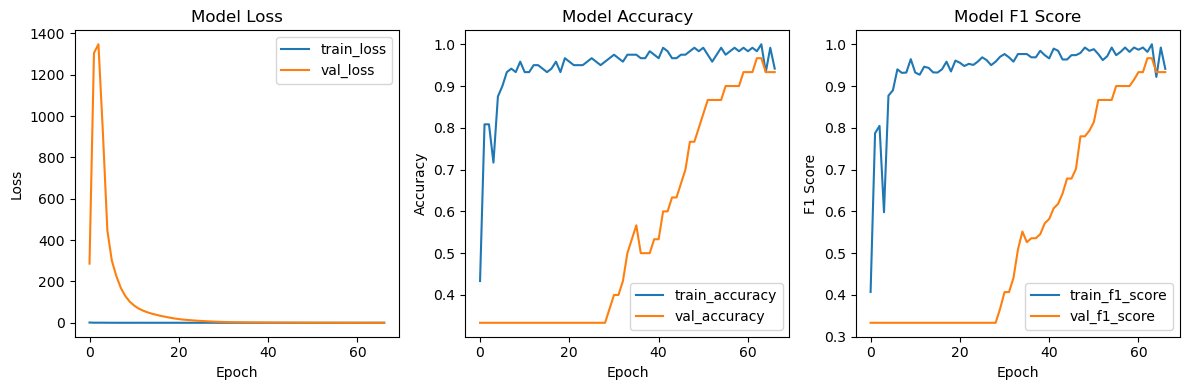

In [7]:
plot_metrics(best_model.history)

# Correlated Binary Encoding

In [18]:
import pandas as pd
def order_columns_by_correlation(df: pd.DataFrame, label: str, isIndx : bool = False) -> list:
    '''
        Order the columns of the dataframe in a sequence where the first element is the column most correlated with the label
            and every success element is the remaining column most correlated with its predecessor
    '''

    current_columns : pd.DataFrame = df.columns.copy()
    new_df          : pd.DataFrame = df.copy()
    new_column_order: list = []
    label_class_map : dict = {}

    print(f'ordering columns by correlation: {label}, {len(current_columns)}, {df[label].unique()}')

    for i, category in enumerate(df[label].unique()):
        label_class_map[category] = i

    new_df[label] = new_df[label].map(label_class_map)


    current: str = label
    last: str = None
    stop_condition = 2 if isIndx else 1

    while len(current_columns) > stop_condition:
        last = current
        current_columns = current_columns.drop(current)
        current = new_df[current_columns].corrwith(new_df[current]).abs().idxmax()
        new_column_order.append(current)

    if isIndx:
        new_column_order.insert(0, 'Id')
    new_column_order.append(label)
    return new_column_order

In [19]:
correlated_order = order_columns_by_correlation(df, 'Species', True)

ordering columns by correlation: Species, 6, ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [20]:
correlated_df = df.reindex(columns=correlated_order)

In [21]:
x = correlated_df.drop(['Species', 'Id'], axis=1)
Y = correlated_df['Species']
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (150, 3)
Y (150,)
This value should be True: True


In [ ]:
# FIXME - update the image directory to point to a directory where you want the images to be saved. Create a folder there.
# Change any other constants you want to change
image_directory = "/mnt/sda1/image-results-iris-correlated"
feature_types = get_column_data_types(x)
precision = 64
one = 128
zero = 0
n_jobs = -1
# For feature_types, 0 = float, 1 = int, 2 = bool
print(feature_types)

In [51]:
convert_samples_to_binary(x, correlated_df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

In [52]:
dirs = Y.unique().tolist()
if not os.path.exists(image_directory + '/data'):
    os.mkdir(image_directory + '/data')
new_dir = image_directory + '/data/'
if not os.path.exists(new_dir+'Train/'):
    os.mkdir(new_dir+'Train/')
for i in dirs:
    i = str(i).split('-')[1]
    if not os.path.exists(new_dir+'Train/'+i):
        os.mkdir(new_dir+'Train/'+i)

In [53]:
total_images = 0
type_counts = {value.split("-")[1]: 0 for value in dirs}
for file in os.listdir(image_directory):
    try:
        dir = file.split("-")[1].split(".")[0]
    except:
        continue
    type_counts[dir]+=1
    shutil.move(f"{image_directory}/{file}", f"{new_dir}Train/{dir}/{file}")
    total_images += 1
print(total_images)
print(type_counts)

150
{'setosa': 50, 'versicolor': 50, 'virginica': 50}


In [4]:
image_directory = "/mnt/sda1/image-results-iris-correlated"
new_dir = image_directory + '/data/'

In [5]:
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

2023-03-05 20:46:01.340248: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-03-05 20:46:01.340944: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-03-05 20:46:01.372547: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-05 20:46:01.372830: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.7715GHz coreCount: 20 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 298.32GiB/s
2023-03-05 20:46:01.372847: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-03-05 20:46:01.374200: I tensorflow/stream_executor/platform/d

Fold:  0
Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


2023-03-05 20:46:02.759055: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:46:02.759079: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 20:46:02.759101: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2023-03-05 20:46:02.759660: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.10.1
2023-03-05 20:46:02.827066: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:46:02.827157: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 20:46:02.909184: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-03-05 20:46:02.928129: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 4200000000 Hz


Epoch 1/100


2023-03-05 20:46:06.810818: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-03-05 20:46:06.955402: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-03-05 20:46:07.528646: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-03-05 20:46:07.586692: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


2/4 [==============>...............] - ETA: 0s - loss: 1.5340 - acc: 0.2500 - f1_m: 0.1139 - precision_m: 0.1482 - recall_m: 0.0938 - auc: 0.3863 - false_negatives: 43.0000 - false_positives: 24.5000 - true_negatives: 71.5000 - true_positives: 5.0000 - mean_absolute_error: 0.4830 - mean_squared_error: 0.3039  

2023-03-05 20:46:45.938308: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:46:45.938337: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 20:46:45.997525: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.


3/4 [=====================>........] - ETA: 0s - loss: 1.4863 - acc: 0.2847 - f1_m: 0.1573 - precision_m: 0.2065 - recall_m: 0.1285 - auc: 0.4265 - false_negatives: 54.3333 - false_positives: 30.0000 - true_negatives: 98.0000 - true_positives: 9.6667 - mean_absolute_error: 0.4693 - mean_squared_error: 0.2926

2023-03-05 20:46:45.999416: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 20:46:46.008059: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-03-05 20:46:46.036386: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:46:46.065145: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_05_20_46_46
2023-03-05 20:46:46.087532: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_05_20_46_46/drake-pc.trace.json.gz
2023-03-05 20:46:46.141934: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-corr

4/4 [==============================] - 98s 18s/step - loss: 1.4081 - acc: 0.3342 - f1_m: 0.2241 - precision_m: 0.2798 - recall_m: 0.1906 - auc: 0.4856 - false_negatives: 67.8000 - false_positives: 38.0000 - true_negatives: 134.8000 - true_positives: 18.6000 - mean_absolute_error: 0.4474 - mean_squared_error: 0.2754 - val_loss: 8.5022 - val_acc: 0.3333 - val_f1_m: 0.3333 - val_precision_m: 0.3333 - val_recall_m: 0.3333 - val_auc: 0.4892 - val_false_negatives: 20.0000 - val_false_positives: 20.0000 - val_true_negatives: 40.0000 - val_true_positives: 10.0000 - val_mean_absolute_error: 0.4479 - val_mean_squared_error: 0.4383

Epoch 00001: val_acc improved from -inf to 0.33333, saving model to /mnt/sda1/image-results-iris-correlated/results/fold0-resnet50v2-saved-model-01-val_acc-0.33.hdf5
Epoch 2/100
4/4 [==============================] - 0s 75ms/step - loss: 0.6398 - acc: 0.7099 - f1_m: 0.7241 - precision_m: 0.7881 - recall_m: 0.6740 - auc: 0.8961 - false_negatives: 24.6000 - false_positi

2023-03-05 20:47:57.700874: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:47:57.700902: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 20:47:57.701023: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:47:57.701087: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.2680 - acc: 0.5119 - f1_m: 0.3933 - precision_m: 0.4405 - recall_m: 0.3594 - auc_1: 0.5838 - false_negatives_1: 27.0000 - false_positives_1: 17.0000 - true_negatives_1: 63.0000 - true_positives_1: 13.0000 - mean_absolute_error: 0.4106 - mean_squared_error: 0.2435 

2023-03-05 20:48:01.557138: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:48:01.557163: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.1681 - acc: 0.5283 - f1_m: 0.4138 - precision_m: 0.4795 - recall_m: 0.3687 - auc_1: 0.6416 - false_negatives_1: 45.7500 - false_positives_1: 25.5000 - true_negatives_1: 118.5000 - true_positives_1: 26.2500 - mean_absolute_error: 0.3858 - mean_squared_error: 0.2250

2023-03-05 20:48:01.956256: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-05 20:48:01.960079: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 20:48:01.971132: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-03-05 20:48:02.010381: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:48:02.046412: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_05_20_48_02
2023-03-05 20:48:02.069000: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_05_20_48_02/drake-pc.trace.json.gz
2023-03-05 20:48:02.133

4/4 [==============================] - 6s 661ms/step - loss: 1.1409 - acc: 0.5360 - f1_m: 0.4239 - precision_m: 0.4926 - recall_m: 0.3767 - auc_1: 0.6585 - false_negatives_1: 50.8000 - false_positives_1: 28.0000 - true_negatives_1: 135.2000 - true_positives_1: 30.8000 - mean_absolute_error: 0.3778 - mean_squared_error: 0.2197 - val_loss: 15.1045 - val_acc: 0.2667 - val_f1_m: 0.2667 - val_precision_m: 0.2667 - val_recall_m: 0.2667 - val_auc_1: 0.4911 - val_false_negatives_1: 22.0000 - val_false_positives_1: 22.0000 - val_true_negatives_1: 38.0000 - val_true_positives_1: 8.0000 - val_mean_absolute_error: 0.4777 - val_mean_squared_error: 0.4538

Epoch 00001: val_acc improved from -inf to 0.26667, saving model to /mnt/sda1/image-results-iris-correlated/results/fold1-resnet50v2-saved-model-01-val_acc-0.27.hdf5
Epoch 2/100
4/4 [==============================] - 0s 70ms/step - loss: 0.6648 - acc: 0.8019 - f1_m: 0.7941 - precision_m: 0.8200 - recall_m: 0.7701 - auc_1: 0.8996 - false_negatives_

2023-03-05 20:48:14.976169: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:48:14.976196: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 20:48:14.976346: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:48:14.976412: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.2898 - acc: 0.4062 - f1_m: 0.3644 - precision_m: 0.4492 - recall_m: 0.3073 - auc_2: 0.5949 - false_negatives_2: 30.5000 - false_positives_2: 17.0000 - true_negatives_2: 71.0000 - true_positives_2: 13.5000 - mean_absolute_error: 0.4119 - mean_squared_error: 0.2527 

2023-03-05 20:48:18.827030: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:48:18.827053: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.2268 - acc: 0.4058 - f1_m: 0.3820 - precision_m: 0.4602 - recall_m: 0.3277 - auc_2: 0.6221 - false_negatives_2: 48.5000 - false_positives_2: 27.7500 - true_negatives_2: 120.2500 - true_positives_2: 25.5000 - mean_absolute_error: 0.3968 - mean_squared_error: 0.2408

2023-03-05 20:48:19.212067: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-05 20:48:19.214593: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 20:48:19.224270: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1735 callback api events and 1683 activity events. 
2023-03-05 20:48:19.255848: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:48:19.286923: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_05_20_48_19
2023-03-05 20:48:19.309351: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_05_20_48_19/drake-pc.trace.json.gz
2023-03-05 20:48:19.366

4/4 [==============================] - 5s 608ms/step - loss: 1.1935 - acc: 0.4163 - f1_m: 0.3968 - precision_m: 0.4741 - recall_m: 0.3424 - auc_2: 0.6389 - false_negatives_2: 53.0000 - false_positives_2: 30.2000 - true_negatives_2: 136.2000 - true_positives_2: 30.2000 - mean_absolute_error: 0.3884 - mean_squared_error: 0.2342 - val_loss: 14.2387 - val_acc: 0.4333 - val_f1_m: 0.4333 - val_precision_m: 0.4333 - val_recall_m: 0.4333 - val_auc_2: 0.5706 - val_false_negatives_2: 17.0000 - val_false_positives_2: 17.0000 - val_true_negatives_2: 43.0000 - val_true_positives_2: 13.0000 - val_mean_absolute_error: 0.3842 - val_mean_squared_error: 0.3786

Epoch 00001: val_acc improved from -inf to 0.43333, saving model to /mnt/sda1/image-results-iris-correlated/results/fold2-resnet50v2-saved-model-01-val_acc-0.43.hdf5
Epoch 2/100
4/4 [==============================] - 0s 73ms/step - loss: 0.5172 - acc: 0.8546 - f1_m: 0.8463 - precision_m: 0.8805 - recall_m: 0.8149 - auc_2: 0.9424 - false_negatives

2023-03-05 20:48:38.308704: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:48:38.308728: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 20:48:38.308860: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:48:38.308918: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.1109 - acc: 0.5089 - f1_m: 0.4240 - precision_m: 0.5357 - recall_m: 0.3516 - auc_3: 0.6684 - false_negatives_3: 28.5000 - false_positives_3: 13.5000 - true_negatives_3: 74.5000 - true_positives_3: 15.5000 - mean_absolute_error: 0.3829 - mean_squared_error: 0.2144 

2023-03-05 20:48:41.992473: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:48:41.992497: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.0403 - acc: 0.5346 - f1_m: 0.4679 - precision_m: 0.5837 - recall_m: 0.3926 - auc_3: 0.7009 - false_negatives_3: 43.2500 - false_positives_3: 20.0000 - true_negatives_3: 128.0000 - true_positives_3: 30.7500 - mean_absolute_error: 0.3682 - mean_squared_error: 0.2027

2023-03-05 20:48:42.360464: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-05 20:48:42.362156: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 20:48:42.371324: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1735 callback api events and 1683 activity events. 
2023-03-05 20:48:42.400573: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:48:42.429606: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_05_20_48_42
2023-03-05 20:48:42.451846: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_05_20_48_42/drake-pc.trace.json.gz
2023-03-05 20:48:42.505

4/4 [==============================] - 5s 571ms/step - loss: 1.0202 - acc: 0.5427 - f1_m: 0.4808 - precision_m: 0.5949 - recall_m: 0.4062 - auc_3: 0.7117 - false_negatives_3: 47.4000 - false_positives_3: 22.2000 - true_negatives_3: 144.2000 - true_positives_3: 35.8000 - mean_absolute_error: 0.3625 - mean_squared_error: 0.1992 - val_loss: 38.5670 - val_acc: 0.3333 - val_f1_m: 0.3333 - val_precision_m: 0.3333 - val_recall_m: 0.3333 - val_auc_3: 0.5000 - val_false_negatives_3: 20.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 40.0000 - val_true_positives_3: 10.0000 - val_mean_absolute_error: 0.4444 - val_mean_squared_error: 0.4444

Epoch 00001: val_acc improved from -inf to 0.33333, saving model to /mnt/sda1/image-results-iris-correlated/results/fold3-resnet50v2-saved-model-01-val_acc-0.33.hdf5
Epoch 2/100
4/4 [==============================] - 0s 75ms/step - loss: 0.6041 - acc: 0.8615 - f1_m: 0.8385 - precision_m: 0.8775 - recall_m: 0.8042 - auc_3: 0.9327 - false_negatives

2023-03-05 20:48:58.856294: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:48:58.856318: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 20:48:58.856425: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:48:58.856485: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.5774 - acc: 0.2173 - f1_m: 0.2005 - precision_m: 0.2417 - recall_m: 0.1719 - auc_4: 0.4260 - false_negatives_4: 33.0000 - false_positives_4: 21.0000 - true_negatives_4: 59.0000 - true_positives_4: 7.0000 - mean_absolute_error: 0.4726 - mean_squared_error: 0.3095 

2023-03-05 20:49:03.036722: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 20:49:03.036748: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.4448 - acc: 0.2916 - f1_m: 0.2573 - precision_m: 0.3120 - recall_m: 0.2196 - auc_4: 0.4953 - false_negatives_4: 53.7500 - false_positives_4: 31.5000 - true_negatives_4: 112.5000 - true_positives_4: 18.2500 - mean_absolute_error: 0.4448 - mean_squared_error: 0.2826

2023-03-05 20:49:03.394473: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-05 20:49:03.396298: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 20:49:03.405797: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-03-05 20:49:03.437072: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 20:49:03.466968: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_05_20_49_03
2023-03-05 20:49:03.489809: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_05_20_49_03/drake-pc.trace.json.gz
2023-03-05 20:49:03.546

4/4 [==============================] - 6s 572ms/step - loss: 1.3996 - acc: 0.3183 - f1_m: 0.2807 - precision_m: 0.3391 - recall_m: 0.2403 - auc_4: 0.5205 - false_negatives_4: 59.0000 - false_positives_4: 34.0000 - true_negatives_4: 129.2000 - true_positives_4: 22.6000 - mean_absolute_error: 0.4346 - mean_squared_error: 0.2734 - val_loss: 6.4983 - val_acc: 0.4000 - val_f1_m: 0.4000 - val_precision_m: 0.4000 - val_recall_m: 0.4000 - val_auc_4: 0.5128 - val_false_negatives_4: 18.0000 - val_false_positives_4: 18.0000 - val_true_negatives_4: 42.0000 - val_true_positives_4: 12.0000 - val_mean_absolute_error: 0.4069 - val_mean_squared_error: 0.3784

Epoch 00001: val_acc improved from -inf to 0.40000, saving model to /mnt/sda1/image-results-iris-correlated/results/fold4-resnet50v2-saved-model-01-val_acc-0.40.hdf5
Epoch 2/100
4/4 [==============================] - 0s 71ms/step - loss: 0.4665 - acc: 0.7935 - f1_m: 0.7935 - precision_m: 0.8848 - recall_m: 0.7208 - auc_4: 0.9391 - false_negatives_

In [6]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.02785656014457345, 'acc': 0.9900000095367432, 'f1_m': 0.9895585179328918, 'precision_m': 0.9911458253860473, 'recall_m': 0.9880208253860474, 'auc': 0.9999999403953552, 'false_negatives': 0.0, 'false_positives': 0.0, 'true_negatives': 240.0, 'true_positives': 120.0, 'mean_absolute_error': 0.012554620718583464, 'mean_squared_error': 0.005042126795160584, 'val_loss': 0.6475868433713913, 'val_acc': 0.9133333325386047, 'val_f1_m': 0.913333284854889, 'val_precision_m': 0.9133333325386047, 'val_recall_m': 0.9133333325386047, 'val_auc': 0.9916666150093079, 'val_false_negatives': 1.0, 'val_false_positives': 1.0, 'val_true_negatives': 59.0, 'val_true_positives': 29.0, 'val_mean_absolute_error': 0.07001718506217003, 'val_mean_squared_error': 0.055811944976449014, 'lr': 2.0399998038556078e-05}


In [7]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.0040924097411334515, 'acc': 1.0, 'f1_m': 1.0, 'precision_m': 1.0, 'recall_m': 1.0, 'auc': 0.9999999403953552, 'false_negatives': 0.0, 'false_positives': 0.0, 'true_negatives': 240.0, 'true_positives': 120.0, 'mean_absolute_error': 0.002604903420433402, 'mean_squared_error': 0.00020247801148798317, 'val_loss': 0.15192505717277527, 'val_acc': 0.9666666388511658, 'val_f1_m': 0.966666579246521, 'val_precision_m': 0.9666666388511658, 'val_recall_m': 0.9666666388511658, 'val_auc': 0.9916666150093079, 'val_false_negatives': 1.0, 'val_false_positives': 1.0, 'val_true_negatives': 59.0, 'val_true_positives': 29.0, 'val_mean_absolute_error': 0.03394140303134918, 'val_mean_squared_error': 0.022756818681955338, 'lr': 2.4999998e-05}


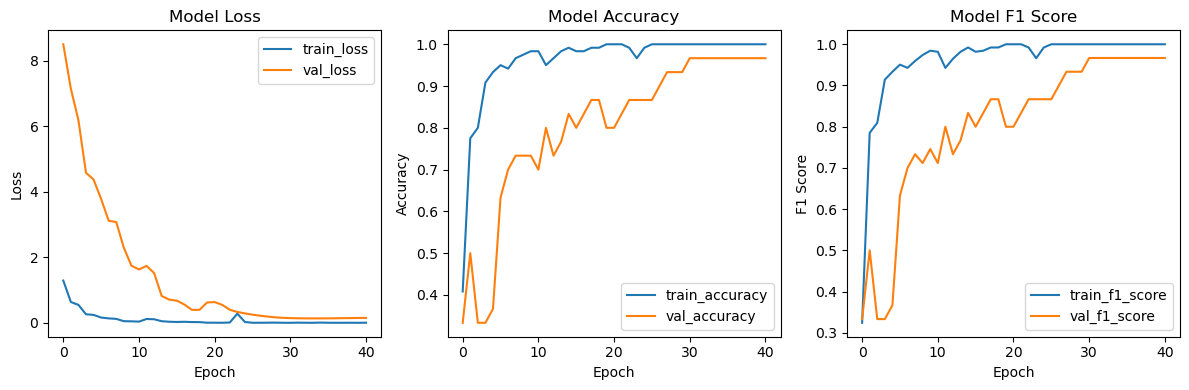

In [8]:
plot_metrics(best_model.history)

# DELETE after further experimentation

In [19]:
import numpy as np
import matplotlib.pyplot as plt
def plots(ims, figsize=(12,6), rows=3, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)-10):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

2023-03-05 20:34:19.321912: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2023-03-05 20:34:19.321935: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/drake/miniconda3/lib/python3.8/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB

Found 150 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

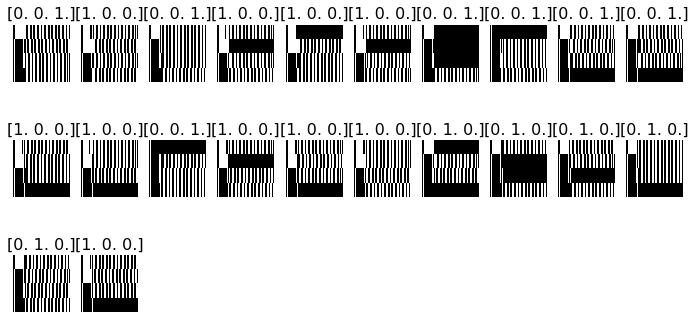

In [20]:
from keras_preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory( "/mnt/sda1/image-results-iris-correlated/data/Train",
                                                batch_size=32,class_mode='categorical')
imgs, labels = next(test_generator)
plots(imgs, titles=labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


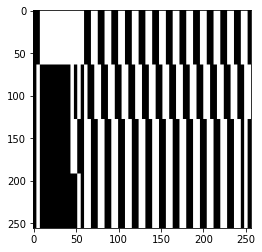

In [21]:
# print imgs[0] as an image
plt.imshow(imgs[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Found 150 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


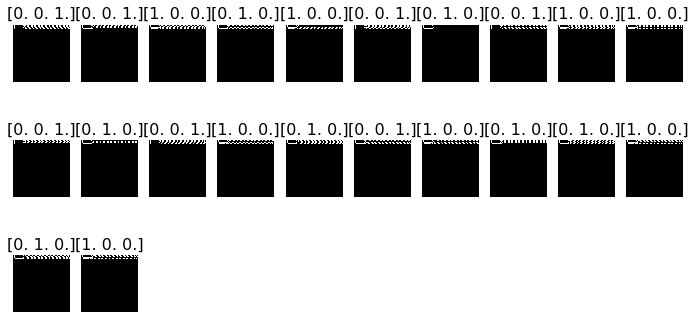

In [22]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory( "/mnt/sda1/image-results-iris/data/Train",target_size=(64,64),
                                                batch_size=32,class_mode='categorical')
imgs, labels = next(test_generator)
plots(imgs, titles=labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


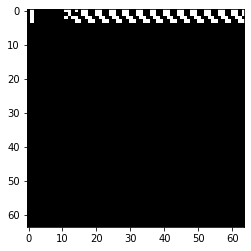

In [23]:
plt.imshow(imgs[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


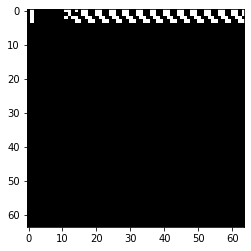

In [24]:
plt.imshow(imgs[0])

# TEST

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 1 images belonging to 1 classes.


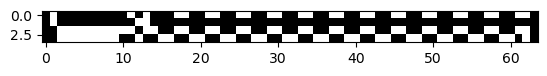

In [45]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory( "/mnt/sda1/image-results-iris/TEST",target_size=(4,64),
                                                batch_size=32,class_mode='categorical')
imgs, labels = next(test_generator)
plt.imshow(imgs[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 1 images belonging to 1 classes.


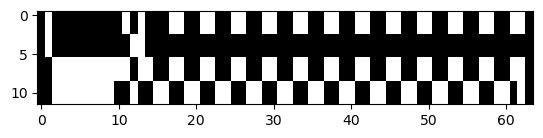

In [48]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory( "/mnt/sda1/image-results-iris/TEST",target_size=(12,64),
                                                batch_size=32,class_mode='categorical')
imgs, labels = next(test_generator)
plt.imshow(imgs[0])